# Investigate a Dataset: TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#reference">Reference</a></li>
</ul>

<a id='intro'></a>
## Introduction
<br/>
<div style="text-align: justify"> 
    In this project a TMDb movie dataset was presented and envistegated to answer the research questions. We will expand explore and clean the dataset to end up with suffecient answers. This report consist of 3 sections. The first section is present the data wrangling for gathering, assessment and cleaning the dataset. Second section, named exploratory data analysis, involves statistics and visualizations to address the research questions above. Finally, the project conclusions.
</div>


In [177]:
# all of the packages to use are imported.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

<a id='wrangling'></a>
## Data Wrangling
<br/>
<div style="text-align: justify"> In this section of the report, the data is loaded in, cleanliness is checked, and dataset is cleaned for analysis. We will handle and point out the potintial problems with data such as, missing data or null value, duplicate data and incorrect datatypes. 
</div> 
______<br/>
Let's inspect the data to understand the structure and figure out any changes we have to make.

### General Properties

In [178]:
# load movies data into data frame 'movies'
movies_data = pd.read_csv("tmdb-movies.csv")

In [179]:
type(movies_data)

pandas.core.frame.DataFrame

In [180]:
# display first five rows of data
movies_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Now that we have a brief insight of the datasets structure, let's see what other questions we could explore the data to answer. Then, let's check and fix the data types, null values, and duplicate rows. 
> 1- Which year has the highest number of movies releases? <br/>
2- What's the average runtime for the movies (Longest Vs. Lowest Runtime)<br/>
3- Profits earned over the years. (Highest Vs. Lowest)<br/>
4- What is the average rating of the movies (Highest and Lowest rating movies)<br/>
5- Which genre has the most movie release so far?<br/>
6- Which actors have the most number of movies?<br/>
7- What kinds of properties are associated with movies that have high revenues?<br/>

In [181]:
movies_data.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

Notice that `popularity`, `vote_average`, `budget_adj`, and `revenue_adj` datatypes are float64. Also, the `release_data` datatype need to be converted to datetime type.

In [182]:
movies_data.shape

(10866, 21)

There's a total 10866 of entries or rows.

In [183]:
# this displays a concise summary of the dataframe,
# including the number of non-null values in each column
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

We can see that there are columns that have missing values / null values.  

In [184]:
movies_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


These are some summary statistic...



## Data Cleaning 

### 1. Incorrect Datatypes

In [185]:
#Change the 'release_data' from object to datetime format
movies_data.release_date = pd.to_datetime(movies_data['release_date']) 

In [186]:
columns = ['popularity', 'revenue_adj','budget_adj','vote_average']
#applymanp() to convert the defined columns to the data type specified as argument
movies_data[columns] = movies_data[columns].applymap(np.int64) 

In [187]:
#lets check the datatype now.
movies_data.dtypes

id                               int64
imdb_id                         object
popularity                       int64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                     int64
release_year                     int64
budget_adj                       int64
revenue_adj                      int64
dtype: object

### 2 . Delete the columns we won't use

We will delete the columns that we don't need in our analysis.

In [188]:
#Deleting the un-used columns
columns=['id','imdb_id','budget_adj','revenue_adj','homepage','tagline'
         ,'keywords','overview','production_companies']#,'vote_count','vote_average']
movies_data = movies_data.drop(columns,axis=1)

In [189]:
movies_data.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6,2015
1,28,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7,2015
2,13,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6,2015
3,11,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7,2015
4,9,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7,2015


### 2. Duplicate Rows

In [190]:
movies_data.duplicated().sum()

1

There is only 1 duplicated row we can drop it.

In [191]:
movies_data.drop_duplicates(keep ='first', inplace=True)

In [192]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10865 non-null  int64         
 1   budget          10865 non-null  int64         
 2   revenue         10865 non-null  int64         
 3   original_title  10865 non-null  object        
 4   cast            10789 non-null  object        
 5   director        10821 non-null  object        
 6   runtime         10865 non-null  int64         
 7   genres          10842 non-null  object        
 8   release_date    10865 non-null  datetime64[ns]
 9   vote_count      10865 non-null  int64         
 10  vote_average    10865 non-null  int64         
 11  release_year    10865 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(4)
memory usage: 1.1+ MB


There are columns that have null values (less than 10866 entries).

### 3. Missing Values / NAN

Let's see how many null values we need to handle. 

In [193]:
#To sum the null data in each column
movies_data.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

considering the 10886 entries we have, we can say it's safe to drop the rows that contain  null value

In [194]:
print("budget:", movies_data[(movies_data['budget']==0)].shape[0])
print("revenue:", movies_data[(movies_data['revenue']==0)].shape[0])
print("runtime:", movies_data[(movies_data['runtime']==0)].shape[0])

budget: 5696
revenue: 6016
runtime: 31


From the numbers we conclude that deleting over a half of the dataset could affect our analysis and give inappropiate result especially in calculating profits. The 0's in the `budget` and `revenue` will be kept as long as they do not affect the questions regarding the highest profits and revenues. However, we can drop the rows with 0's in `runtime` column.

In [195]:
#replace all the values from '0' to NAN to drop it later
movies_data['runtime'] = movies_data['runtime'].replace(0, np.NAN)

In [196]:
#Removing all the row which has NaN value in the data frame
movies_data=movies_data.dropna()

In [197]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10703 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10703 non-null  int64         
 1   budget          10703 non-null  int64         
 2   revenue         10703 non-null  int64         
 3   original_title  10703 non-null  object        
 4   cast            10703 non-null  object        
 5   director        10703 non-null  object        
 6   runtime         10703 non-null  float64       
 7   genres          10703 non-null  object        
 8   release_date    10703 non-null  datetime64[ns]
 9   vote_count      10703 non-null  int64         
 10  vote_average    10703 non-null  int64         
 11  release_year    10703 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 1.1+ MB


In [198]:
#Adjust the runtime datatype to int.
movies_data['runtime'] = movies_data['runtime'].astype(np.int64) 
movies_data['runtime'].dtype

dtype('int64')

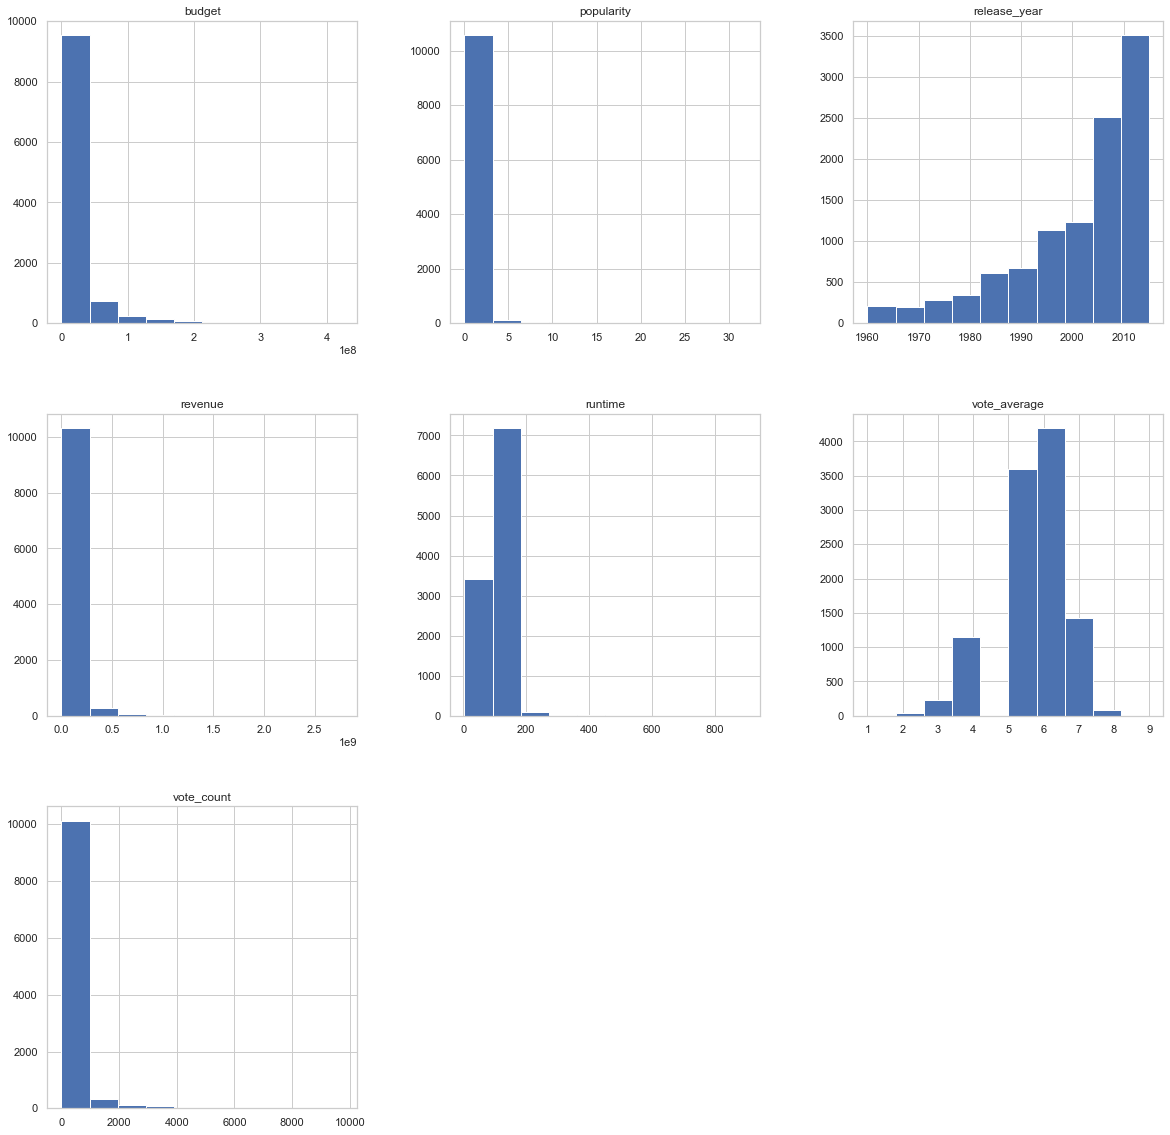

In [199]:
movies_data.hist(figsize=(20,20));

The data now is clean enough and it's ready for analysis. <br/>
Let's continue to explore the data to address the research questions!

<a id='eda'></a>
## Exploratory Data Analysis

### Q1: Which year has the highest number of movies releases?

release_year
2011    529
2012    572
2013    644
2014    680
2015    610
Name: original_title, dtype: int64


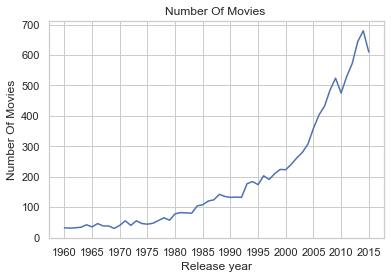

In [200]:
# make group for each year and count the number of movies in each year 
data=movies_data.groupby('release_year').count()['original_title']
print(data.tail())
#make group of the data according to their release year and count the total number of movies in each year and pot.
movies_data.groupby('release_year').count()['original_title'].plot(xticks = np.arange(1960,2016,5))
#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Number Of Movies ")
plt.xlabel('Release year')
plt.ylabel('Number Of Movies')
sns.set_style("whitegrid")

### Q2: What's the average runtime for movies (Highest, Lowest and Average Runtime)

In [201]:
def calculate(x):
    #idmin() to find the index of lowest profit movie.
    min_index = movies_data[x].idxmin()
    #idmax() to find the index of Highest profit movie.
    high_index = movies_data[x].idxmax()
    high = pd.DataFrame(movies_data.loc[high_index,:])
    low = pd.DataFrame(movies_data.loc[min_index,:])
    
    return pd.concat([high,low],axis = 1)

#call calculate
calculate('runtime')

,3894,1112
popularity,0,0
budget,0,0
revenue,0,0
original_title,The Story of Film: An Odyssey,Batman: Strange Days
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Kevin Conroy|Brian George|Tara Strong
director,Mark Cousins,Bruce Timm
runtime,900,3
genres,Documentary,Action|Animation
release_date,2011-09-03 00:00:00,2014-04-09 00:00:00
vote_count,14,20


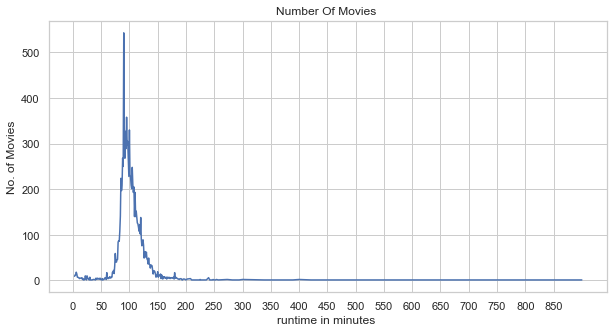

In [202]:
movies_data.groupby('runtime').count()['original_title']
movies_data.groupby('runtime').count()['original_title'].plot(xticks = np.arange(0,900,50))
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Number Of Movies ")
plt.xlabel('runtime in minutes ')
plt.ylabel('No. of Movies')
sns.set_style("whitegrid")

In [203]:
movies_data['runtime'].mean()

102.73689619732785

The average number of movies runtime is 102 mins. 

### Q3: Highest and lowest profits earned by the movies over the years.

In [204]:
movies_data['profit']=movies_data['revenue']-movies_data['budget']

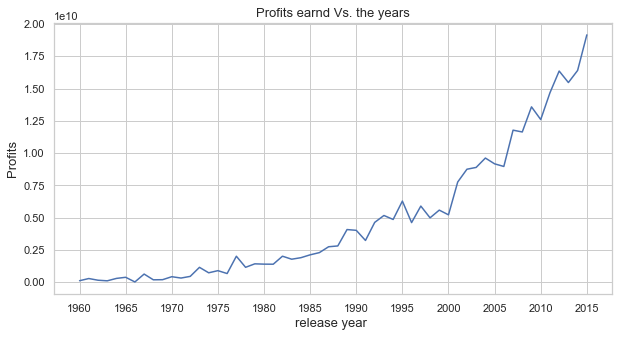

In [205]:
movies_data.groupby('release_year')['profit'].sum().plot(xticks = np.arange(1960,2016,5))
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Profits earnd Vs. the years",fontsize=13)
plt.xlabel('release year ',fontsize = 13)
plt.ylabel('Profits',fontsize = 13)
sns.set_style("whitegrid")

In [206]:
movies_data['profit'].describe()

count    1.070300e+04
mean     2.558405e+07
std      9.726864e+07
min     -4.139124e+08
25%      0.000000e+00
50%      0.000000e+00
75%      1.012045e+07
max      2.544506e+09
Name: profit, dtype: float64

In [207]:
#call the calculate function
calculate('profit')

,1386,2244
popularity,9,0
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00
vote_count,8458,74


### Q4: What is the average rating of the movies (Highest and Lowest rating movies)

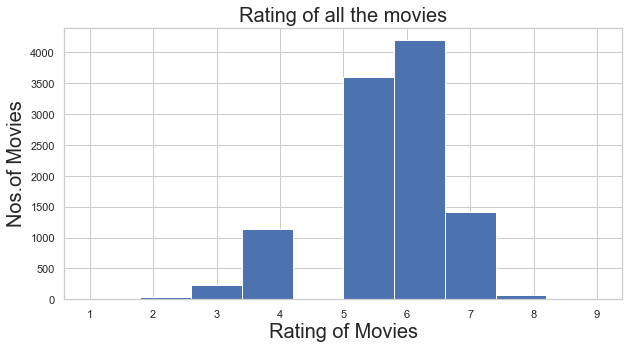

In [208]:
plt.xlabel('Rating of Movies', fontsize = 20)
plt.ylabel('Nos.of Movies', fontsize=20)
plt.title('Rating of all the movies', fontsize=20)
plt.hist(data = movies_data, x = 'vote_average');

In [209]:
calculate('vote_average')

,3894,7772
popularity,0,0
budget,0,0
revenue,0,0
original_title,The Story of Film: An Odyssey,Transmorphers
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Matthew Wolf|Amy Weber|Shaley Scott|Eliza Swen...
director,Mark Cousins,Leigh Scott
runtime,900,86
genres,Documentary,Action|Adventure|Science Fiction
release_date,2011-09-03 00:00:00,2007-06-26 00:00:00
vote_count,14,10


### Q5: Which genre has the most movie releases so far? 

In [210]:
#make a function will will split the string and return the count of each genre.
def count(x):
    #concatenate all the rows
    data_plot = movies_data[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

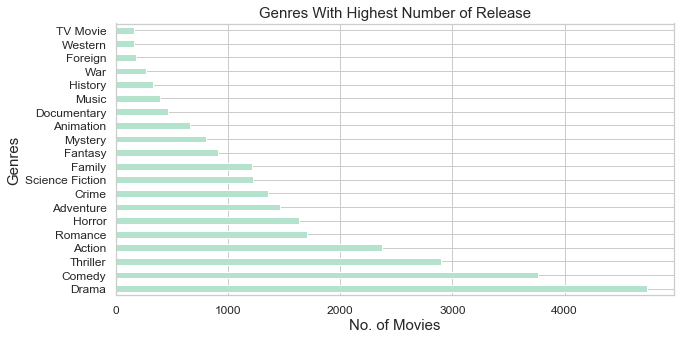

In [211]:
#call the function for counting the movies of each genre.
total_genre_movies = count('genres')
#plot a barh plot using plot function for 'genre vs number of movies'.
total_genre_movies.iloc[:20].plot.barh(figsize=(10,5),colormap='Pastel2',fontsize=12)
#setup the title and the labels of the plot.
plt.title("Genres With Highest Number of Release",fontsize=15)
plt.xlabel('No. of Movies',fontsize=15)
plt.ylabel("Genres",fontsize= 15)
sns.set_style("whitegrid")

Drama, comedy, thriller and action genres are the most genres with no. of movies respectively. There are at least 4500 movies under drama genre.

### Q6: Which actors have the most number of movies?

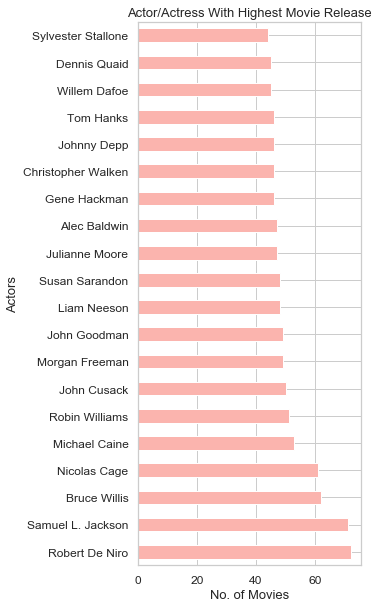

In [212]:
#call the function to count the movies of each cast member
movies = count('cast')
#plot the barh plot using plot function for 'cast memeber against the number of movies'.
movies.iloc[:20].plot.barh(figsize=(4,10),colormap='Pastel1',fontsize=12)
plt.title("Actor/Actress With Highest Movie Release",fontsize=13)
plt.xticks(rotation = 0)
plt.xlabel('No. of Movies',fontsize=13)
plt.ylabel("Actors",fontsize= 13)
sns.set_style("whitegrid")

These are the actors with the most movies. Robert De Niro appears to be the actor with 72 movies, followed up by Samuel Jackson with 71 movies.

In [213]:
movies.head(20)

Robert De Niro        72
Samuel L. Jackson     71
Bruce Willis          62
Nicolas Cage          61
Michael Caine         53
Robin Williams        51
John Cusack           50
Morgan Freeman        49
John Goodman          49
Liam Neeson           48
Susan Sarandon        48
Julianne Moore        47
Alec Baldwin          47
Gene Hackman          46
Christopher Walken    46
Johnny Depp           46
Tom Hanks             46
Willem Dafoe          45
Dennis Quaid          45
Sylvester Stallone    44
dtype: int64

### Q7: What kinds of properties are associated with movies that have high revenues?

In [214]:
movies_data['revenue'].max()

2781505847

In [215]:
highest_revenue = pd.DataFrame(movies_data.loc[movies_data['revenue'].idxmax(),:])
highest_revenue

,1386
popularity,9
budget,237000000
revenue,2781505847
original_title,Avatar
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,James Cameron
runtime,162
genres,Action|Adventure|Fantasy|Science Fiction
release_date,2009-12-10 00:00:00
vote_count,8458


<a id='conclusions'></a>
## Conclusion
<br/>
<div style="text-align: justify"> 
We conclude that, it is proven over the years that the production companies has been releasing more movies and earning more profits. This indicate the growth of the movies/films industry. The average runtime that is prefered for most of the movies is about 2 hours (01:42:00 hours, 102 mins). The most active and most growing genres are drama, comedy,thirller, action, and romance also some of the highest profits earned movies are under those genres. 
The limitation of our analysis, we could've dropped the rows with 0's revenue and budget but then we would have to delete over half of the dataset. These analysis are not 100% percent recommended to be taken as a key guidline because the data are not very recent and lack in revenue, budget and profits calculations.
    </div>

<a id='reference'></a>
## Reference
[[1]](https://www.kaggle.com/tmdb/tmdb-movie-metadata) – TMDb Movies Dataset on Kaggle <br/>
[[2]](https://classroom.udacity.com/nanodegrees/nd002-connect/parts/9c4fa82f-b4cb-40fe-91df-e97aefff5f87/modules/0a58e8ea-c644-4024-861e-1a06ec4009c1/lessons/6b41e57c-9270-413b-b713-c6b2ec207b04/concepts/93c6a1e3-9386-4806-99a3-a03c34ce19c3) – Udacity - Investigate a Dataset, Data Analysis <br/>
[[3]](https://medium.com/better-programming/how-to-use-colormaps-with-matplotlib-to-create-colorful-plots-in-python-969b5a892f0c) – To create colorful plots <br/>
[[4]](https://dillinger.io) – To use markdown notation <br/>
[[5]](https://youtu.be/exqjWW3_BTY) – Data Analysis on a Kaggle's Dataset, Youtube